Project Steps Overview
Your tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

your data wrangling efforts
your data analyses and visualizations

Here, we will assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import json
import requests as rs
import snscrape as sc
import tweepy as ty
import os
from datetime import date

In [2]:
twit_arch_enh_df = pd.read_csv('C:/Users/USER/Desktop/Udacity Nanodegree projects/Project 2/Data/twitter-archive-enhanced.csv')

In [3]:
twit_arch_enh_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
# Print all tweet_archieve dataset to assess it visually
twit_arch_enh_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
twit_arch_enh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
twit_arch_enh_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [7]:
images_df = pd.read_csv('C:/Users/USER/Desktop/Udacity Nanodegree projects/Project 2/Data/image-predictions.tsv', sep = "\t")

In [8]:
## Print all images dataset to assess it visually
images_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
images_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
images_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [13]:
images_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
images_df['p1'].value_counts().plot(kind='bar', figsize = (10, 10))

<AxesSubplot:>

In [ ]:
tweet_df = pd.read_json('C:/Users/USER/Desktop/Udacity Nanodegree projects/Project 2/Data/tweet-json.txt', lines = True)

In [ ]:
#df3 = pd.read_csv('C:/Users/USER/Desktop/Udacity Nanodegree projects/Project 2/Data/tweet-json.txt', sep = "\t")

In [ ]:
# Print all tweet dataset to assess it visually
tweet_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [ ]:
tweet_df.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [ ]:
#Getting a list of all the columns
tweet_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

geo, coordinates, contributors, al have nan entries.

In [ ]:
tweet_df['geo'] #checking the geo of the user variable

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2349   NaN
2350   NaN
2351   NaN
2352   NaN
2353   NaN
Name: geo, Length: 2354, dtype: float64

In [ ]:
tweet_df['user'][1] #checking the content of the user variable

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™ (author)',
 'screen_name': 'dog_rates',
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 3200889,
 'friends_count': 104,
 'listed_count': 2784,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 114031,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5288,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'prof

# Gather: Summary
Gathering is the first step in the data wrangling process. We could finish the high-level gathering process:

# Obtaining data
Getting data from an existing file (twitter-archive-enhanced.csv) Reading from csv file using pandas
Downloading a file from the internet (image-predictions.tsv) Downloading file using requests
Querying an API (tweet_json.txt) Get JSON object of all the tweet_ids using Tweepy
Importing that data into our programming environment (Jupyter Notebook)

# Assess
After gathering the data needed for the task, the next step is to assess them visually and programmatically for quality and tidiness issues. We will detect and document at quality issues and tidiness issues.

# Assessing the data programmaticaly

# Quality Issues Identified for twitter-archive-enhanced Dataset

# Quality
Completeness, Validity, Accuracy, Consistency (i.e content issues)

# Archive Dataset

1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers instead of float
2. retweeted_status_timestamp, timestamp should be datetime instead of object (string)
3. The numerator and denominator columns have invalid values
4. In several columns null objects are non-null (None to NaN)



# Tidiness/Structural Issues Identified for twitter-archive-enhanced Dataset
A. Timestamp needs to be separated into dates and time columns seperately
B. The different names of the dog are doggo, floofer, pupper, puppo, should be in a column.


# archive dataset
Name column have invalid names i.e 'None', 'a', 'an'
We only want original ratings (no retweets) that have images
We may want to change this columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to string because We don't want any operations on them
images dataset

Missing values from images dataset (2075 rows instead of 2356)
Some tweet_ids have the same jpg_url
Some tweets are have 2 different tweet_id one redirect to the other
json_tweeets dataset

This tweet_id (666020888022790149) duplicated 8 times
Tidiness
Untidy data => a.k.a structural issues

No need to all the informations in images dataset, (tweet_id and jpg_url what matters)
Various stages of dogs in columns instead of rows archives dataset
We may want to add a gender column from the text columns in archives dataset
All tables should be part of one dataset
NB : We could add a column called jpg_url_api contain the query of the api media_url_https it will have the same result as the images dataset


# Quality Issues Identified for image-predictions Dataset
A. 
B. Empty/Null values are stored as None and should be identified and replaced.
C. High missing values for name of the dog and four different maturity stages columns.
D. Missing values from images dataset (2075 rows instead of 2356)
Some tweet_ids have the same jpg_url
Some tweets are have 2 different tweet_id one redirect to the other


# Tidiness/Structural (Untidy Data) Issues Identified for image-predictions Dataset
A. Timestamp needs to be separated into dates and time columns seperately
B. The different names of the dog are doggo, floofer, pupper, puppo, should be in a column.


Tidiness
Untidy data => a.k.a structural issues

No need to all the informations in images dataset, (tweet_id and jpg_url what matters)
Various stages of dogs in columns instead of rows archives dataset
We may want to add a gender column from the text columns in archives dataset
All tables should be part of one dataset
NB : We could add a column called jpg_url_api contain the query of the api media_url_https it will have the same result as the images dataset






# Quality Issues Identified for tweet-json Dataset
A. json_tweeets dataset
This tweet_id (666020888022790149) duplicated 8 times

# Tidiness/Structural Issues Identified for tweet-json Dataset
A. Timestamp needs to be separated into dates and time columns seperately
B. The different names of the dog are doggo, floofer, pupper, puppo, should be in a column.





tweet_id: The integer representation of the unique identifier for this Tweet.
in_reply_to_status_id: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
in_reply_to_user_id_str: If the represented Tweet is a reply, this field will contain the string representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet
retweet_count: Number of times this Tweet has been retweeted
favorite_count: Indicates approximately how many times this Tweet has been liked by Twitter users

Quality

Completeness, Validity, Accuracy, Consistency => a.k.a content issues

## Cleaning Data
In this section, I will clean **all** of the issues I documented while assessing the data. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [ ]:
# Make copies of original pieces of data
twit_arch_enh_df_copy = twit_arch_enh_df.copy()
images_df_copy = images_df.copy()    
tweet_df_copy = tweet_df.copy()

# Step 2: Cleaning Dataa
Cleaning our data is the third step in data wrangling. It is where we will fix the quality and tidiness issues that we identified in the assess step.

# Issue 1: 
Delete irrelevant and redundant columns
# Define: Drop columns
'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
'retweeted_status_timestamp'
# Code

In [ ]:
dropped_col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp']
twit_arch_enh_df_copy = twit_arch_enh_df_copy.drop(columns=dropped_col)

# Issue 2: 
timestamp should be datetime instead of object (string)
# Define: 
Convert timestamp to datetime datatype from object (string)
# Code

In [ ]:
# Convert timestamp column to DateTime using Series.astype() method 
twit_arch_enh_df_copy['timestamp'] = twit_arch_enh_df_copy['timestamp'].astype('datetime64[ns]')

# Issue 3: 
The numerator and denominator columns have invalid values
# Define: 
Extract ratings  from "text" column
# Code

In [ ]:
twit_arch_enh_df_copy['rating_denominator'] = twit_arch_enh_df_copy['text'].str.extract('.*?(\d{1,3}\/10)', expand=False).str.split('/').str[1]
twit_arch_enh_df_copy['rating_numerator'] = twit_arch_enh_df_copy['text'].str.extract('.*?(\d{1,3}\/10)', expand=False).str.split('/').str[0]

# Issue 4: 
NaN values are stored as None in dog stages 'doggo', 'floofer', 'pupper', 'puppo'
# Define: 
Identify and replace None with numpy's not a number(NaN)
# Code

In [ ]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    twit_arch_enh_df_copy[stage] = twit_arch_enh_df_copy[stage].replace('None',np.nan)

# Issue 5: 
Inconsistent header
# Define: 
Rename id column to tweet_id
# Code

In [ ]:
"""
Define: rename id column to tweet_id
Code
"""
tweet_df.rename(columns = {'id':'tweet_id'}, inplace = True)

In [ ]:
twit_arch_enh_df_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [ ]:
twit_arch_enh_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2340 non-null   object        
 6   rating_denominator  2340 non-null   object        
 7   name                2356 non-null   object        
 8   doggo               97 non-null     object        
 9   floofer             10 non-null     object        
 10  pupper              257 non-null    object        
 11  puppo               30 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 221.0+ KB


# Tidiness

# Issue 
1: Four dog stages 'doggo', 'floofer', 'pupper', 'puppo' in different columns

# Define: 
Merge the four stages into one and drop them after it's been 

# Code

In [ ]:
twit_arch_enh_df_copy['dog_stage'] = twit_arch_enh_df_copy[twit_arch_enh_df_copy.columns[8:]].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [ ]:
twit_arch_enh_df_copy.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [ ]:
#replace '' with np.nan
twit_arch_enh_df_copy['dog_stage'] = twit_arch_enh_df_copy['dog_stage'].replace('',np.nan)

In [ ]:
# Testing
twit_arch_enh_df_copy.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [ ]:
#delete columns after merging
twit_arch_enh_df_copy.drop(["doggo","floofer","pupper","puppo"], axis=1, inplace=True)

In [ ]:
twit_arch_enh_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2340 non-null   object        
 6   rating_denominator  2340 non-null   object        
 7   name                2356 non-null   object        
 8   dog_stage           380 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 165.8+ KB


In [ ]:
twit_arch_enh_df_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [ ]:
images_df_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [ ]:
tweet_df_copy.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [ ]:
"""
dropping 'created at', 'entities', 'source', 'in_reply_to_status_id','in_reply_to_status_id_str',
'in_reply_to_user_id', 'in_reply_to_user_id_str', 'geo', 'coordinates', 'place','contributors',
'in_reply_to_screen_name', ''retweeted_status','quoted_status_id', 'quoted_status_id_str', 'quoted_status'
"""       

dropped_col = ['created at', 'entities', 'source', 'in_reply_to_status_id','in_reply_to_status_id_str',
'in_reply_to_user_id', 'in_reply_to_user_id_str', 'geo', 'coordinates', 'place','contributors',
'in_reply_to_screen_name', 'retweeted_status','quoted_status_id', 'quoted_status_id_str', 'quoted_status'
]      

keep_col = ['id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'extended_entities',
        'user','is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang']

In [ ]:
#dropping the selected column list above with the 90% null value query
def remv(dff):

    for column in tweet_df_copy.columns.values.tolist():
      missing_values = tweet_df_copy[column].isnull().sum()        #total missing values in a column
      total_rows = len(tweet_df_copy)                    
      pomv = (missing_values/total_rows)*100            #percentage of missing val in a col
      if pomv>90:
         del(tweet_df_copy[column])

    return dff

In [ ]:
#creating a new data frame
tweet_df_copy  = remv(tweet_df_copy)

In [ ]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

In [ ]:
tweet_df_copy['truncated'].value_counts()

False    2354
Name: truncated, dtype: int64

In [ ]:
tweet_df_copy['retweeted'].value_counts()

False    2354
Name: retweeted, dtype: int64

In [ ]:
tweet_df_copy['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [ ]:
tweet_df_copy['possibly_sensitive'].value_counts()

0.0    2211
Name: possibly_sensitive, dtype: int64

In [ ]:
tweet_df_copy['possibly_sensitive_appealable'].value_counts()

0.0    2211
Name: possibly_sensitive_appealable, dtype: int64

I discovered that the truncated and the retweeted columns has just one category.
Hence, we have to drop these. 

In [ ]:
#columns to be dropped
drop_cols = ['truncated', 'source','retweeted','possibly_sensitive',
             'possibly_sensitive_appealable']

In [ ]:
#dropping selected columns   #add to pipeline
dftweet_df_copy = tweet_df_copy.drop(['truncated', 'source','retweeted','possibly_sensitive',
               'possibly_sensitive_appealable'], axis = 1)
tweet_df_copy.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,0.0,0.0,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,0.0,0.0,en


In [ ]:
master_df = twit_arch_enh_df_copy.merge(images_df_copy, 
                                  on = 'tweet_id', how='left').merge(tweet_df_copy,
                                                                     on = 'tweet_id', how='left')
 

KeyError: 'tweet_id'

In [ ]:
master_df.head(2)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853.0,39467.0,False,False,0.0,0.0,en
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514.0,33819.0,False,False,0.0,0.0,en


In [ ]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   int64              
 1   timestamp                      2356 non-null   datetime64[ns]     
 2   source_x                       2356 non-null   object             
 3   text                           2356 non-null   object             
 4   expanded_urls                  2297 non-null   object             
 5   rating_numerator               2340 non-null   object             
 6   rating_denominator             2340 non-null   object             
 7   name                           2356 non-null   object             
 8   dog_stage                      380 non-null    object             
 9   jpg_url                        2075 non-null   object             
 10  img_num                 

# Storing Combined Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
master_df.to_csv('twitter_archive_master.csv', index=False)

# Analyzing and Visualizing Data
In this section, I will analyze and visualize your wrangled data. 
I will also produce at least **three (3) insights and one (1) visualization.**

# Visualization

In [ ]:
#Loading master data and having a peep at the the content
df = pd.read_csv('twitter_archive_master.csv')
df.head(2)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853.0,39467.0,False,False,0.0,0.0,en
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514.0,33819.0,False,False,0.0,0.0,en


In [ ]:
df.columns

Index(['tweet_id', 'timestamp', 'source_x', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'id_str',
       'full_text', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'source_y', 'user', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2356 non-null   int64  
 1   timestamp                      2356 non-null   object 
 2   source_x                       2356 non-null   object 
 3   text                           2356 non-null   object 
 4   expanded_urls                  2297 non-null   object 
 5   rating_numerator               2340 non-null   float64
 6   rating_denominator             2340 non-null   float64
 7   name                           2356 non-null   object 
 8   dog_stage                      380 non-null    object 
 9   jpg_url                        2075 non-null   object 
 10  img_num                        2075 non-null   float64
 11  p1                             2075 non-null   object 
 12  p1_conf                        2075 non-null   f

In [ ]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,id_str,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable
count,2.356000e+03,2340.000000,2340.0,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2.354000e+03,2354.000000,2354.000000,2211.0,2211.0
mean,7.427716e+17,11.809402,10.0,1.203855,0.594548,1.345886e-01,6.032417e-02,7.426978e+17,3164.797366,8080.968564,0.0,0.0
std,6.856705e+16,24.434266,0.0,0.561875,0.271174,1.006657e-01,5.090593e-02,6.852812e+16,5284.770364,11814.771334,0.0,0.0
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,6.660209e+17,0.000000,0.000000,0.0,0.0
25%,6.783989e+17,10.000000,10.0,1.000000,0.364412,5.388625e-02,1.622240e-02,6.783975e+17,624.500000,1415.000000,0.0,0.0
50%,7.196279e+17,11.000000,10.0,1.000000,0.588230,1.181810e-01,4.944380e-02,7.194596e+17,1473.500000,3603.500000,0.0,0.0
75%,7.993373e+17,12.000000,10.0,1.000000,0.843855,1.955655e-01,9.180755e-02,7.993058e+17,3652.000000,10122.250000,0.0,0.0
max,8.924206e+17,776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,8.924206e+17,79515.000000,132810.000000,0.0,0.0


In [ ]:
def scatter_plotter(xaxis,yaxis,titl):
    df.plot(kind='scatter', x=xaxis,y=yaxis, title=titl);

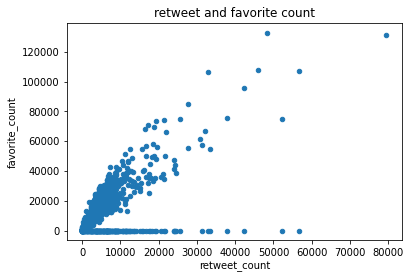

In [ ]:
scatter_plotter('retweet_count','favorite_count', 'retweet and favorite count')

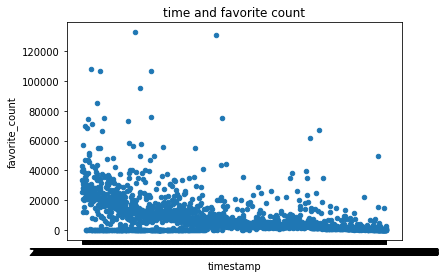

In [ ]:
#trying to show what time particular time of the day the audience interact with the posts
scatter_plotter('timestamp','favorite_count', 'time and favorite count')

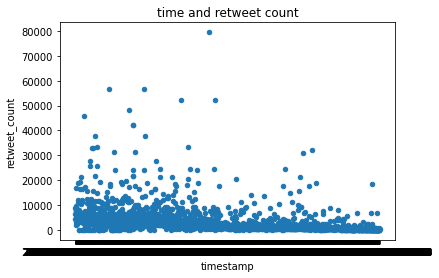

In [ ]:
#trying to show what time particular time of the day the audience interact with the posts
scatter_plotter('timestamp','retweet_count', 'time and retweet count')

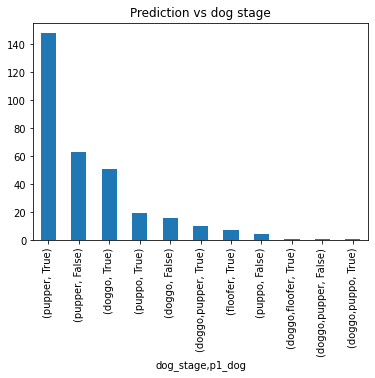

In [ ]:
#To see the popular dog stage in the data set
df[['dog_stage','p1_dog']].value_counts().plot(kind='bar', title='Prediction vs dog stage'); 

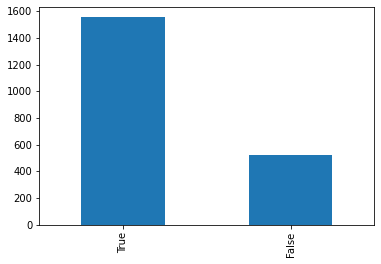

In [ ]:
df['p2_dog'].value_counts().plot(kind='bar');

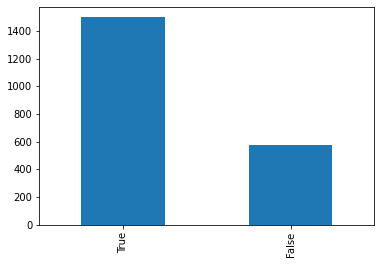

In [ ]:
df['p3_dog'].value_counts().plot(kind='bar');

# Insights:
1. Majority of the dogs rated are in the 'pupper stage', followed weakly by the 'doggo' and 'puppo'


2. retweet and favorite count are not significantly influenced by the time of post


3. Most of the "p1" predictions for the stage "pupper" came out to be true


4. Other preductions viz. p2_dog, p3_dog both have similar effectiveness as the p1_dog from the distribution of True and False

# Limitations
- Data set was collated over a long period of time which might question its accuracy. 
- There were instance of missing data some of which were dropped hence a question of representativeness.